# Muhammad Irvan Hakim
# 2109106057
# Posttest 6 (Deep Neural Network)

#### Import Library pandas

In [131]:
import pandas as pd

#### Menginput File CSV Menggunakan Pandas

In [132]:
df = pd.read_csv('Wine_Quality_Dataset.csv')
df

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 1. Split dataset menjadi train dan test

#### Import train_test_split dari Library Sklearn

In [133]:
from sklearn.model_selection import train_test_split

#### Deklarasi variable X dan variable y (Target)

In [134]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['is_red']
X,y

(      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.66         0.00             1.8      0.075   
 ...             ...               ...          ...             ...        ...   
 5315            6.2              0.21         0.29             1.6      0.039   
 5316            6.6              0.32         0.36             8.0      0.047   
 5317            6.5              0.24         0.19             1.2      0.041   
 5318            5.5              0.29         0.30             1.1      0.022   
 5319            6.0              0.21         0.38             0.8      0.020   
 
       free_su

#### Buat kelas train_test_split. Nilai test_size kita kasih 0.3 saja agar 30% dari data akan menjadi testing set dan 70% dari data akan menjadi training set

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Lakukan preprocessing (seperti cleaning, encoding, dll.) pada dataset

#### Memeriksa jumlah nilai null pada dataset

In [136]:
df.isna().sum()

Unnamed: 0              0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

#### Dikarenakan tidak terdapat nilai NULL, maka tidak perlu dilakukan data cleaning

## 3. Gunakan sequential model

#### Import Library

In [137]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from matplotlib import pyplot as plt

#### Jalankan kodingan dibawah ini untuk membuat sequential model

In [138]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[11]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Variabel "es" digunakan sebagai callback selama pelatihan model untuk menghentikan pelatihan jika metrik "val_accuracy" pada data validasi tidak membaik setelah 5 iterasi berturut-turut dan opsi "restore_best_weights" digunakan untuk mengembalikan bobot model ke iterasi dengan performa terbaik.

In [139]:
es = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

#### Jalankan kodingan dibawah ini untuk melatih model DNN

In [140]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.3, verbose=1, callbacks=[es])

Epoch 1/1000


82/82 [==============================] - 1s 3ms/step - loss: 1.0546 - accuracy: 0.8078 - val_loss: 0.2507 - val_accuracy: 0.9052
Epoch 2/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9248 - val_loss: 0.2254 - val_accuracy: 0.9141
Epoch 3/1000
82/82 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9309 - val_loss: 0.2031 - val_accuracy: 0.9249
Epoch 4/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9367 - val_loss: 0.2121 - val_accuracy: 0.9302
Epoch 5/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9348 - val_loss: 0.1899 - val_accuracy: 0.9302
Epoch 6/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9359 - val_loss: 0.1976 - val_accuracy: 0.9374
Epoch 7/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9405 - val_loss: 0.1848 - val_accuracy: 0.9347
Epoch 8/1000
82/82 

In [141]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                192       
                                                                 
 dense_37 (Dense)            (None, 32)                544       
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1825 (7.13 KB)
Trainable params: 1825 (7.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Lakukan evaluasi model terhadap data test

In [142]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 931us/step - loss: 0.1262 - accuracy: 0.9618


[0.12623244524002075, 0.9617794752120972]

## 5. Buat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

#### Mengambil metrik akurasi (accuracy) dari setiap epoch

In [143]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

#### Membuat grafik akurasi

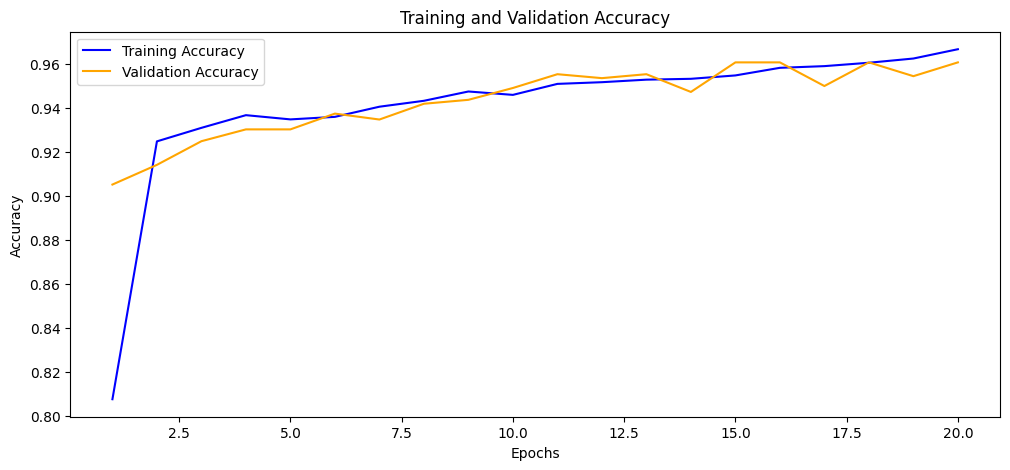

In [144]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Mengambil loss dari setiap epoch

In [145]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

#### Membuat grafik loss

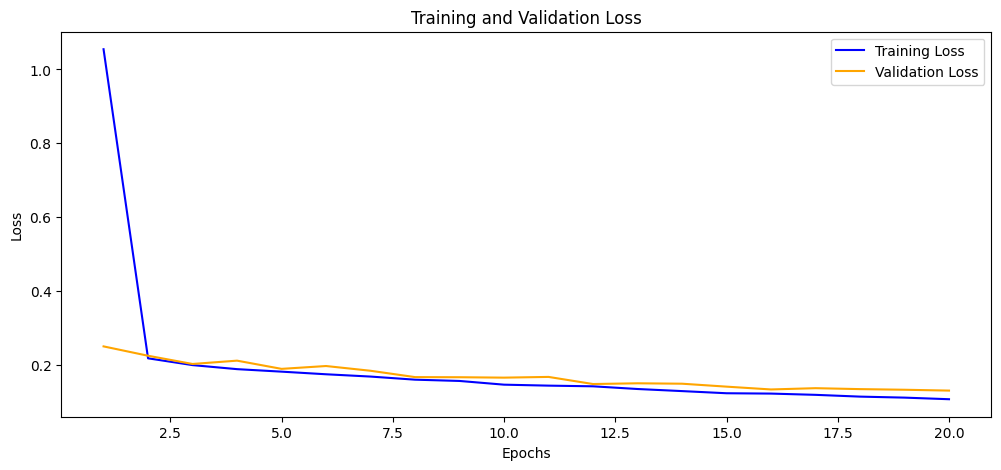

In [146]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Menyimpan model yang telah dilatih

In [147]:
model.save('model_posttest_6.h5')

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
